# Basic Functionality Example

This notebook demonstrates the core features of pynrn:
- Creating sections
- Inserting mechanisms
- Connecting sections
- Recording data
- Running simulations

In [1]:
import pynrn as nrn
import numpy as np
import matplotlib.pyplot as plt

## Creating Sections and Inserting Mechanisms

In [2]:
# Create a simulation context
sim = nrn.Context()

# Create sections
soma = nrn.Section(name='soma')
dend = nrn.Section(name='dendrite')

# Set morphology
soma.L = 20  # length in microns
soma.diam = 20  # diameter in microns
dend.L = 100
dend.diam = 2

# Insert mechanisms
soma.insert('hh')  # Hodgkin-Huxley channels
dend.insert('pas')  # passive membrane

# Set passive properties
for seg in dend:
    seg.pas.g = 0.001  # conductance
    seg.pas.e = -70    # reversal potential

## Connecting Sections

In [3]:
# Connect dendrite to soma
dend.connect(soma(1.0))

print(f"Soma has {soma.nchild} children")
print(f"Dendrite parent: {dend.parent}")

Soma has 1 children
Dendrite parent: <pynrn.section.Section object at 0x7f0cb99d1340>


## Adding Stimulation

In [4]:
# Add current clamp to soma
ic = nrn.IClamp(soma(0.5), delay=10, dur=20, amp=50)

print(f"Current clamp amplitude: {ic.amp} nA")
print(f"Current clamp duration: {ic.dur} ms")

Current clamp amplitude: FloatVar(IClamp[0].amp=50.0) nA
Current clamp duration: FloatVar(IClamp[0].dur=20.0) ms


## Recording Data

In [5]:
type(sim._t)

pynrn.reference.FloatHocVar

In [6]:
# Record voltage at soma and dendrite
v_soma = nrn.Vector(soma(0.5).v)
v_dend = nrn.Vector(dend(0.5).v)

# Record time
t_vec = nrn.Vector()
t_vec.record(sim.t)


## Running the Simulation

In [7]:
# Run simulation
sim.run(dt=0.025, celsius=37, tstop=50)

# Convert to numpy arrays
t = t_vec.asarray()
v_soma_arr = v_soma.asarray()
v_dend_arr = v_dend.asarray()

## Plotting Results

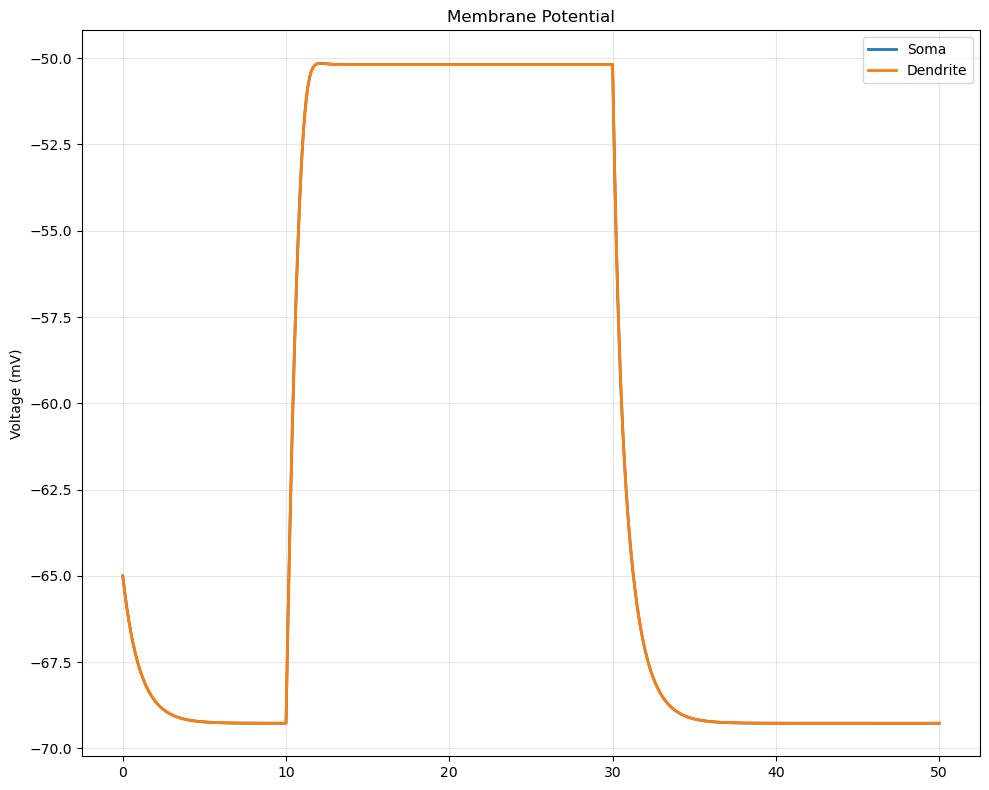

In [8]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot voltages
ax.plot(t, v_soma_arr, label='Soma', linewidth=2)
ax.plot(t, v_dend_arr, label='Dendrite', linewidth=2)
ax.set_ylabel('Voltage (mV)')
ax.set_title('Membrane Potential')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Inspecting the Model

In [9]:
# Show section properties
print("Soma properties:")
print(f"  Length: {soma.L} μm")
print(f"  Diameter: {soma.diam} μm")
print(f"  Mechanisms: {list(soma.mechanisms)}")

print("\nDendrite properties:")
print(f"  Length: {dend.L} μm")
print(f"  Diameter: {dend.diam} μm")
print(f"  Mechanisms: {list(dend.mechanisms)}")

# Show available mechanisms
print("\nAvailable mechanisms:")
for mech in nrn.Mechanism.all_mechanism_types():  # Show first 10
    print(f"  {mech}")

Soma properties:
  Length: 20.0 μm
  Diameter: 20 μm
  Mechanisms: ['k_ion', 'na_ion', 'hh']

Dendrite properties:
  Length: 100.0 μm
  Diameter: 2 μm
  Mechanisms: ['pas']

Available mechanisms:
  morphology
  capacitance
  pas
  extracellular
  fastpas
  na_ion
  k_ion
  hh
  IClamp
  AlphaSynapse
  ExpSyn
  Exp2Syn
  SEClamp
  VClamp
  OClamp
  APCount
  NetStim
  IntFire1
  IntFire2
  IntFire4
  PointProcessMark
  PatternStim
  VecStim
